## The dataset contains features of customers from a store for different products like wine, meat, fish, fruits etc. The features of customers include income, children, spendings on different products, first purchase date etc. The goal of this analysis is to segment the customers based on their purchasing behaviors

In [320]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.model_selection import KFold

In [321]:
# Reading dataset
data_all = pd.read_csv('marketing_campaign.csv', sep = '\t')
print("Features of the customers: \n")
data_all.columns.to_numpy()

Features of the customers: 



array(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain',
       'Z_CostContact', 'Z_Revenue', 'Response'], dtype=object)

In [322]:
data = data_all.loc[:, ['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'MntWines',
                    'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]
data.describe()

,Year_Birth,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179
std,11.984069,25173.076661,0.538398,0.544538,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000
50%,1970.000000,51381.500000,0.000000,0.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000
75%,1977.000000,68522.000000,1.000000,1.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000
max,1996.000000,666666.000000,2.000000,2.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000


In [323]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,1957,Graduation,Single,58138.0,0,0,635,88,546,172,88,88,3,8,10,4
1,1954,Graduation,Single,46344.0,1,1,11,1,6,2,1,6,2,1,1,2
2,1965,Graduation,Together,71613.0,0,0,426,49,127,111,21,42,1,8,2,10
3,1984,Graduation,Together,26646.0,1,0,11,4,20,10,3,5,2,2,0,4
4,1981,PhD,Married,58293.0,1,0,173,43,118,46,27,15,5,5,3,6


Income has (2240-2216) = 24 empty cells. For this analysis, we will remove the rows with empty Income values.

In [324]:
# Dropping the missing rows
data = data.dropna()

Year of Birth: [ Max = 1996, Min = 1893, Avg = 1968 ]  
Income: [ Max = 666666, Min = 1730, Avg = 52247 ]  
Kids in home: [ Max = 2, Min = 0, Avg = 0.441 ]  
Teens in home: [ Max = 2, Min = 0, Avg = 0.505 ]  
Amount spent on Wines = [ Max = 1493, Min = 0, Avg = 305 ]  
Amount spent on fruits = [ Max = 199, Min = 0, Avg = 26 ]  
Amount spent on Meat = [ Max = 1725, Min = 0, Avg = 167 ]  
Amount spent on fish = [ Max = 259, Min = 0, Avg = 38 ]  
Amount spent on sweets = [ Max = 262, Min = 0, Avg = 27 ]  
Amount spend on gold = [ Max = 321, Min = 0, Avg = 44 ]  
Number of deals purchased = [ Max = 15, Min  =0, Avg = 2 ]  
Number of purchases from web = [ Max = 27, Min = 0, Avg = 4 ]  
Number of catalog purchases = [ Max = 28, Min = 0, Avg = 3 ]
Number of purchases from store = [ Max = 13, Min = 0, Avg = 6 ]

Questions of interest:  
1. How much percentage of income is spent on different products (eg. wine, fruits, gold etc.)?  
2. Is there any relation between age of a person and the food products he spends upon?  
3. Is there any relation between education level and income?  
4. IS there any relation between age of a person and his spending source (eg. store, website)?  
5. Group similar customerss

In [325]:
# # Get percentage spendings on different products
# def get_percentage_spendings(product_name):
#   new_column_name = product_name[3:].lower() + '%'
#   data[new_column_name] = data[product_name]/data['Income']*100
# get_percentage_spendings('MntWines')
# get_percentage_spendings('MntFruits')
# get_percentage_spendings('MntMeatProducts')
# get_percentage_spendings('MntFishProducts')
# get_percentage_spendings('MntSweetProducts')
# get_percentage_spendings('MntGoldProds')
# data.loc[:, ['wines%', 'fruits%', 'meatproducts%', 'fishproducts%', 'sweetproducts%', 'goldprods%']].head()

In [326]:
# correlations between age and products a person spends upon
data['age'] = 2025 - data['Year_Birth']
# age_food_products_columns = []
# for column in data.columns:
#   if column[-1] == '%':
#     age_food_products_columns.append(column)
# age_food_products_columns.insert(0, 'age')
# data.loc[:, age_food_products_columns].corr()

Age has 17% correlation with wine. Other than that there is no significant correlation between age and other products.  
*Note: There is higher correlation between (fruits and fish consumption), (fruits and sweets consumption), (fish and sweets consumption)

In [327]:
# converting education levels to numbers and finding correlation between education level and income of a person
education_map = {'Basic': -2, '2n Cycle': -1, 'Graduation': 0, 'Master': 1, 'PhD': 2}
data['edu_map'] = data['Education'].map(education_map)
data.loc[:, ['edu_map', 'Income']].corr()

,edu_map,Income
edu_map,1.000000,0.149338
Income,0.149338,1.000000


There is 14% correlation between education level with income

In [328]:
# # Finding correlation between age and spending source (stores, websites etc.) of a person
# age_spending_sources_columns = []
# for column in data.columns:
#   if column[-9:] == 'Purchases':
#     age_spending_sources_columns.append(column)
# age_spending_sources_columns.insert(0, 'age')
# data.loc[:, age_spending_sources_columns].corr()

Correlation between Age and spendings on deals = 6%  
Correlation between Age and spendings at websites = 15%  
Correlation between Age and spendings on catalogs = 12%  
Correlation between Age and spendings at stores = 13%

In [329]:
# Creating new categories for marital status, and One-hot-encoding is applied on marital status
data.loc[data['Marital_Status'] == 'Together', 'Marital_Status'] = 'Couple'
data.loc[data['Marital_Status'] == 'Married', 'Marital_Status'] = 'Couple'
data.loc[data['Marital_Status'] == 'Alone', 'Marital_Status'] = 'Single'
data.loc[data['Marital_Status'] == 'Absurd', 'Marital_Status'] = 'Single'
data.loc[data['Marital_Status'] == 'YOLO', 'Marital_Status'] = 'Single'
data.loc[data['Marital_Status'] == 'Divorced', 'Marital_Status'] = 'Single'
data.loc[data['Marital_Status'] == 'Widow', 'Marital_Status'] = 'Single'
data['Marital_Status'] = data['Marital_Status'].astype('category')
marital_encoded = pd.get_dummies(data['Marital_Status'])
data = pd.concat([data, marital_encoded], axis = 1)

In [330]:
# Data preprocessing - creating new column, updating datatype of a column, feature scaling
data['children'] = data['Kidhome'] + data['Teenhome']
data[['Single', 'Couple']] = data[['Single', 'Couple']].astype(int)

In [331]:
# filtered_columns = ['age', 'edu_map', 'Single', 'Couple', 'Divorced', 'Widow', 'children', 'Income', 'wines%', 'fruits%', 'meatproducts%', 'fishproducts%', 'sweetproducts%',
#                     'goldprods%']
filtered_columns = ['age', 'edu_map', 'Single', 'children', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                    'MntGoldProds']
filtered_data = data.loc[:, filtered_columns]
print(f"Checking if any column has null values or not: \n{filtered_data.isnull().any()}")

# removing outliers
print(filtered_data.shape)
# filtered_data = filtered_data.drop(labels = [20, 153, 674, 1636])
print(filtered_data.shape)
print("Data to perform clustering upon: \n")
filtered_data.head()
print(filtered_data.isnull().sum())

Checking if any column has null values or not: 
age                 False
edu_map             False
Single              False
children            False
Income              False
MntWines            False
MntFruits           False
MntMeatProducts     False
MntFishProducts     False
MntSweetProducts    False
MntGoldProds        False
dtype: bool
(2216, 11)
(2216, 11)
Data to perform clustering upon: 

age                 0
edu_map             0
Single              0
children            0
Income              0
MntWines            0
MntFruits           0
MntMeatProducts     0
MntFishProducts     0
MntSweetProducts    0
MntGoldProds        0
dtype: int64


In [332]:
scaled_columns = ['age','Income','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
non_scaled_columns = ['edu_map', 'Single', 'children']
all_columns = scaled_columns + non_scaled_columns
scaler = StandardScaler()
# removed children, single, edu_map for now. Will add them back
filtered_data_scaled_columns = scaler.fit_transform(filtered_data.loc[:, scaled_columns])
filtered_data_scaled = pd.DataFrame(filtered_data_scaled_columns, columns = scaled_columns)
print(filtered_data_scaled.index)
filtered_data_index = filtered_data.index
filtered_data = filtered_data.reset_index(drop=True)
print(filtered_data[non_scaled_columns].index)
filtered_data_scaled = pd.concat([filtered_data.loc[:, non_scaled_columns], filtered_data_scaled], axis = 1)
# filtered_data_scaled = filtered_data_scaled.reindex(filtered_data_index)
print(filtered_data_scaled.isnull().sum())
print(filtered_data_scaled.shape)
filtered_data_scaled.head()

RangeIndex(start=0, stop=2216, step=1)
RangeIndex(start=0, stop=2216, step=1)
edu_map             0
Single              0
children            0
age                 0
Income              0
MntWines            0
MntFruits           0
MntMeatProducts     0
MntFishProducts     0
MntSweetProducts    0
MntGoldProds        0
dtype: int64
(2216, 11)


,edu_map,Single,children,age,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0,1,0,0.986443,0.234063,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031
1,0,1,2,1.236801,-0.234559,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867
2,0,0,0,0.318822,0.769478,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937
3,0,0,1,-1.266777,-1.017239,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171
4,2,0,1,-1.016420,0.240221,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135


In [333]:
for col in all_columns:
  print(col)
  print(filtered_data_scaled[col].max())
  print(filtered_data_scaled[col].min())
print(filtered_data_scaled[filtered_data_scaled['Income'] > 20])
# filtered_data_scaled = filtered_data_scaled.drop([2209])
print(filtered_data_scaled.shape)
print(filtered_data_scaled.isnull().sum())

age
6.3274096281587155
-2.2682086556440346
Income
24.413282343327047
-2.0072498165563903
MntWines
3.522318916593794
-0.9046404106083532
MntFruits
4.339430127185715
-0.6624629594888422
MntMeatProducts
6.948158444610826
-0.7447440414072365
MntFishProducts
4.04390697390871
-0.6875744052131553
MntSweetProducts
5.722241252326637
-0.6582331380486047
MntGoldProds
5.347776904638855
-0.8486890736057782
edu_map
2
-2
Single
1
0
children
3
0
      edu_map  Single  children       age     Income  MntWines  MntFruits  \
2209        0       0         1 -0.682609  24.413282 -0.877954  -0.310571   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  
2209         -0.66447        -0.541428          -0.63388     -0.617045  
(2216, 11)
edu_map             0
Single              0
children            0
age                 0
Income              0
MntWines            0
MntFruits           0
MntMeatProducts     0
MntFishProducts     0
MntSweetProducts    0
MntGoldProds        0
dtype: int64

In [334]:
# import copy
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# print(filtered_data_scaled.columns)
# vif_limit = 5.0
# X_vif = copy.deepcopy(filtered_data_scaled)
# # VIF dataframe
# vif_data = pd.DataFrame()
# vif_data["feature"] = filtered_data_scaled.columns
# # calculating VIF for each feature
# vif_data["VIF"] = [variance_inflation_factor(filtered_data_scaled.values, i)
#                           for i in range(len(filtered_data_scaled.columns))]

# print(vif_data)

# def remove_features_with_vif(X_vif, vif_data):
#   dropped_features = []
#   while(True and len(X_vif.columns) > 0):
#     highest_vif_feature = vif_data[vif_data['VIF'] == max(vif_data['VIF'])]['feature']
#     dropped_features.append(highest_vif_feature)
#     X_vif = X_vif.drop(highest_vif_feature, axis = 1)
#     vif_data = pd.DataFrame()
#     vif_data['feature'] = X_vif.columns
#     vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
#                           for i in range(len(X_vif.columns))]
#     if vif_data[vif_data["VIF"] > vif_limit].shape[0] == 0:
#       break
#   print(vif_data)
#   return X_vif.columns

# selected_features = remove_features_with_vif(X_vif, vif_data)
# print(f"Selected Features: {selected_features}")

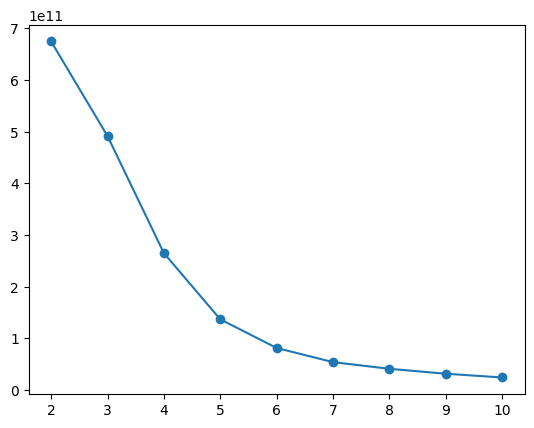

In [335]:
# Using Elbow method to find optimum number of clusters in the data
wcss = []
state = 42
n_clusters = range(2, 11)
for n_cluster in n_clusters:
  kmeans = KMeans(n_clusters = n_cluster, init = 'k-means++', random_state = state)
  # kmeans.fit(filtered_data_scaled)
  kmeans.fit(filtered_data)
  wcss.append(kmeans.inertia_)
plt.plot(n_clusters, wcss, marker = 'o')

In [336]:
def get_k_fold_cv(k, random_state, X):
  kfold = KFold(n_splits = k, shuffle = True, random_state = random_state)
  spl = kfold.split(X)
  return spl


def fit_kmeans_clustering(X):
  no_of_clusters = range(2, 11)
  result_n_clusters = []
  scores = []
  for n_cluster in no_of_clusters:
    kmeans_train = KMeans(n_clusters = n_cluster, init = 'k-means++', random_state = state)
    output = kmeans_train.fit_predict(X)

    score = silhouette_score(X, output)

    # X = pd.concat([X, pd.DataFrame(output, columns = ['cluster'], index = X.index)], axis = 1)
    print(f"Number of clusters: {n_cluster} and Silhouette score: {score}")


    result_n_clusters.append(output)
    scores.append(score)
  return result_n_clusters, scores

# All data clustering
result_n_clusters, scores = fit_kmeans_clustering(filtered_data_scaled)

# K-fold
number_of_folds = 5
random_state = 42
spl = get_k_fold_cv(number_of_folds, random_state, filtered_data_scaled)
for i, (train_index, test_index) in enumerate(spl):
  print(f"Fold: {i}")
  X_train = filtered_data_scaled.iloc[train_index, :]
  result_n_clusters, scores = fit_kmeans_clustering(X_train)


# filtered_data_scaled.head()

# number_of_folds = 10
# random_state = 42
# spl = get_k_fold_cv(number_of_folds, random_state, filtered_data_scaled)

# for i, (train_index, test_index) in enumerate(spl):
#   print(f"Fold: {i}")
#   model, test_r2_fold_i = fit_regression_model_ols_and_get_test_r2(train_index, test_index, X3, y3)
#   test_r2.append(test_r2_fold_i)
#   regressor4_models.append(model)
# mean_test_r2 = np.mean(test_r2)
# print(f"Mean test R-Squared from {number_of_folds} folds: {mean_test_r2}")

Number of clusters: 2 and Silhouette score: 0.3518747617035834
Number of clusters: 3 and Silhouette score: 0.1930895991273225
Number of clusters: 4 and Silhouette score: 0.16224205935420372
Number of clusters: 5 and Silhouette score: 0.16949146513320446
Number of clusters: 6 and Silhouette score: 0.17389008096627404
Number of clusters: 7 and Silhouette score: 0.16307700028768984
Number of clusters: 8 and Silhouette score: 0.16306335302797106
Number of clusters: 9 and Silhouette score: 0.16541902747381437
Number of clusters: 10 and Silhouette score: 0.16663100393329922
Fold: 0
Number of clusters: 2 and Silhouette score: 0.34502925898435854
Number of clusters: 3 and Silhouette score: 0.23556886408935496
Number of clusters: 4 and Silhouette score: 0.16050932593918502
Number of clusters: 5 and Silhouette score: 0.166301975048754
Number of clusters: 6 and Silhouette score: 0.15538844515152303
Number of clusters: 7 and Silhouette score: 0.16397697953827198
Number of clusters: 8 and Silhouett

Optimum number of clusters is 4

In [337]:

# for n_cluster in n_clusters:
#   # Applying PCA for dimensionality reduction
#   pca = PCA(n_components = 2)
#   output = result_n_clusters[n_cluster-2]
#   filtered_data_pca = pca.fit_transform(filtered_data_scaled)
#   print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

#   # Plotting the clusters
#   fig = plt.figure(figsize=(8,4))
#   plt.scatter(filtered_data_pca[:, 0], filtered_data_pca[:, 1], c = output, cmap = 'viridis')
#   plt.title("Clusters visualized using PCA")
#   plt.xlabel("Principal Component 1")
#   plt.ylabel("Principal Component 2")
#   plt.show()
# # filtered_data_pca1 = []
# # output1 = []
# # j = 0
# # for entry in filtered_data_pca:
# #   if entry[1] > 1000:
# #     print(entry)
# #     print(j)
# #     print(output[j])
# #   else:
# #     entry_i = [float(entry[0]), float(entry[1])]
# #     filtered_data_pca1.append(entry_i)
# #     output1.append(output[j])
# #   j+=1

# PCA

import copy

n_comps = range(2, filtered_data_scaled.shape[1]+1)
all_scores = []
filtered_data_pca_n_comps = []
result_n_clusters_n_comps = []
for n_comp in n_comps:
  filtered_data_scaled1 = copy.deepcopy(filtered_data_scaled)
  pca = PCA(n_components = n_comp)
  filtered_data_pca = pca.fit_transform(filtered_data_scaled1)
  print(f"Number of components: {n_comp} - Explained variance ratios: {pca.explained_variance_ratio_} - total explained variance ratio: {np.sum(pca.explained_variance_ratio_)}")
  filtered_data_pca_n_comps.append(filtered_data_pca)
  result_n_clusters, scores = fit_kmeans_clustering(filtered_data_pca)
  all_scores.append(scores)
  result_n_clusters_n_comps.append(result_n_clusters)
avg_cluster_scores = [0] * len(all_scores[0])
for row in all_scores:
  for i_cluster_score in range(len(row)):
    avg_cluster_scores[i_cluster_score] += row[i_cluster_score]/len(all_scores)
print(f"Avg cluster scores: {avg_cluster_scores}")

Number of components: 2 - Explained variance ratios: [0.4102698  0.14283508] - total explained variance ratio: 0.5531048810150605
Number of clusters: 2 and Silhouette score: 0.525670956240395
Number of clusters: 3 and Silhouette score: 0.40497015080435694
Number of clusters: 4 and Silhouette score: 0.38250644583443577
Number of clusters: 5 and Silhouette score: 0.39764374420762105
Number of clusters: 6 and Silhouette score: 0.3808294694538404
Number of clusters: 7 and Silhouette score: 0.35780781762708763
Number of clusters: 8 and Silhouette score: 0.372316434032023
Number of clusters: 9 and Silhouette score: 0.3743817849006148
Number of clusters: 10 and Silhouette score: 0.367334104412731
Number of components: 3 - Explained variance ratios: [0.4102698  0.14283508 0.09088961] - total explained variance ratio: 0.6439944958147387
Number of clusters: 2 and Silhouette score: 0.4583225578585355
Number of clusters: 3 and Silhouette score: 0.3203631729546025
Number of clusters: 4 and Silhouet

In [338]:
# from kmodes.kprototypes import KPrototypes

# num_cols = filtered_data_scaled.columns[:8]  # First 8 are scaled numerical
# cat_cols = filtered_data_scaled.columns[8:]  # Last 2 categorical
# cat_idx = [0,1,2]

# k_range = range(2, 11)

# # Elbow Method (using cost from KPrototypes)
# costs = []
# for k in k_range:
#     kproto = KPrototypes(n_clusters=k, init='Huang', random_state=42)
#     kproto.fit_predict(filtered_data_scaled, categorical=cat_idx)
#     costs.append(kproto.cost_)
# plt.plot(k_range, costs, 'bx-')
# plt.xlabel('Number of clusters')
# plt.ylabel('Cost')
# plt.title('Elbow Method')
# plt.show()

# sil_scores = []
# for k in k_range:
#     kproto = KPrototypes(n_clusters=k, init='Huang', random_state=42)
#     labels = kproto.fit_predict(filtered_data_scaled, categorical=cat_idx)
#     sil_scores.append(silhouette_score(filtered_data_scaled, labels))  # Note: Silhouette uses Euclidean; for mixed, consider custom distance if needed
# plt.plot(k_range, sil_scores, 'bx-')
# plt.xlabel('Number of clusters')
# plt.ylabel('Silhouette Score')
# plt.title('Silhouette Method')
# plt.show()

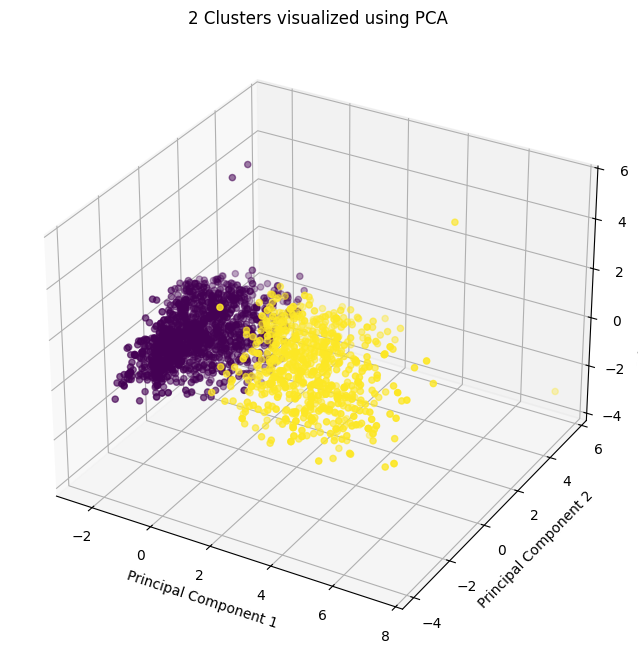

In [339]:
# Plotting the clusters
# 2 clusters
pca_3_comps = []
pc1 = []
pc2 = []
pc3 = []

for pc in filtered_data_pca_n_comps[1]:
  pc1.append(pc[0])
  pc2.append(pc[1])
  pc3.append(pc[2])
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection='3d')

ax.scatter(pc1, pc2, pc3, c = result_n_clusters_n_comps[1][0], cmap = 'viridis')
plt.title("2 Clusters visualized using PCA")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

plt.show()

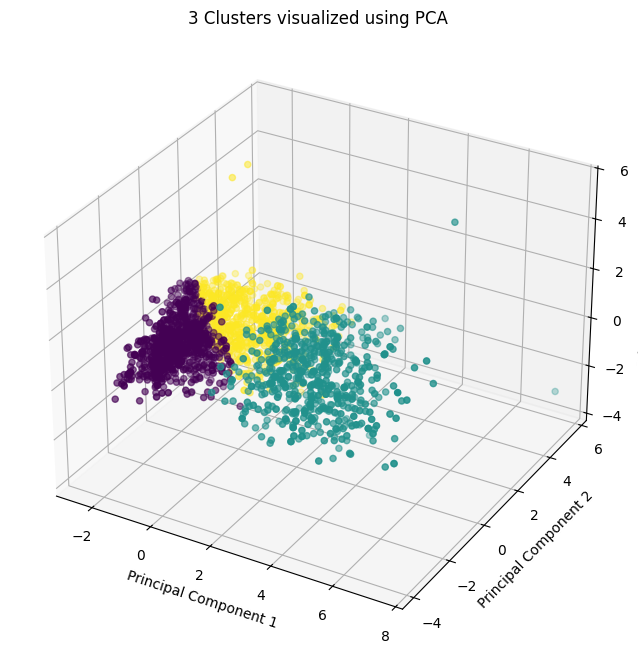

In [340]:
# 3 clusters
pca_3_comps = []
pc1 = []
pc2 = []
pc3 = []

for pc in filtered_data_pca_n_comps[1]:
  pc1.append(pc[0])
  pc2.append(pc[1])
  pc3.append(pc[2])
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection='3d')

ax.scatter(pc1, pc2, pc3, c = result_n_clusters_n_comps[1][1], cmap = 'viridis')
plt.title("3 Clusters visualized using PCA")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

plt.show()

There are outliers in the data. PCA helped to identify the outliers. We need to process or remove the outliers before applying clustering